# <font color=green>Import Libraries</font>

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from sklearn.feature_extraction import stop_words
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Configure Pandas to show all columns
pd.set_option("display.max.columns", None)

# <font color=green>Read extracted .csv</font>

In [3]:
vegan = pd.read_csv('../Data/vegan.csv')
vegan.shape

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (112) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(11685, 113)

In [4]:
vegan.head(10)

approved_at_utc subreddit  \
0              NaN     vegan   
1              NaN     vegan   
2              NaN     vegan   
3              NaN     vegan   
4              NaN     vegan   
5              NaN     vegan   
6              NaN     vegan   
7              NaN     vegan   
8              NaN     vegan   
9              NaN     vegan   

                                            selftext author_fullname  saved  \
0  Hi folks!\n\nThe [Vegan Hacktivists](https://v...     t2_2xq9ryss  False   
1                                                NaN     t2_6klubbgh  False   
2                                                NaN     t2_5pfjptq1  False   
3                                                NaN     t2_6wksotg4  False   
4                                                NaN       t2_7jjvhh  False   
5                                                NaN        t2_igmd6  False   
6                                                NaN       t2_12mr1m  False   
7                                                NaN     t2_4v54l56x  False   
8                                                NaN        t2_egfsy  False   
9  Sometimes I wonder what is the point of all th...     t2_4yc9ap2t  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   
5               NaN       0    False   
6               NaN       0    False   
7               NaN       0    False   
8               NaN       0    False   
9               NaN       0    False   

                                               title link_flair_richtext  \
0  Vegan Hacktivists are looking for Developers, ...                  []   
1  The last words of fellow vegan Elijah McClain ...                  []   
2  30 POUNDS DOWN! Have been vegan since May 3 an...                  []   
3  All Mink Fur Farms To Shut In The Netherlands ...                  []   
4                     Very promising future i think.                  []   
5                           Which one of you was it?                  []   
6  This video was super wholesome. Kayaker saves ...                  []   
7     Veggie combo at my local Ethiopian restaurant!                  []   
8            New sticker. Anyone else feel this way?                  []   
9  Been a vegan now 2 years.. have my moments of ...                  []   

  subreddit_name_prefixed  hidden  pwls link_flair_css_class  downs  \
0                 r/vegan   False     6                  NaN      0   
1                 r/vegan   False     6           Disturbing      0   
2                 r/vegan   False     6               Health      0   
3                 r/vegan   False     6                  NaN      0   
4                 r/vegan   False     6                  NaN      0   
5                 r/vegan   False     6             Activism      0   
6                 r/vegan   False     6            Uplifting      0   
7                 r/vegan   False     6                 Food      0   
8                 r/vegan   False     6            Uplifting      0   
9                 r/vegan   False     6                  NaN      0   

   thumbnail_height  top_awarded_type  hide_score       name  quarantine  \
0               NaN               NaN       False  t3_f3svif       False   
1             140.0               NaN       False  t3_hf6eej       False   
2             140.0               NaN       False  t3_hf55ez       False   
3              93.0               NaN       False  t3_hezfns       False   
4             114.0               NaN       False  t3_hfkmlc       False   
5              68.0               NaN       False  t3_hfjc25       False   
6             105.0               NaN       False  t3_hfgx6e       False   
7             140.0               NaN       False  t3_hf9vwi       False   
8             139.0               Na

In [5]:
vegan.tail(10)

approved_at_utc subreddit  \
11675              NaN     vegan   
11676              NaN     vegan   
11677              NaN     vegan   
11678              NaN     vegan   
11679              NaN     vegan   
11680              NaN     vegan   
11681              NaN     vegan   
11682              NaN     vegan   
11683              NaN     vegan   
11684              NaN     vegan   

                                                selftext author_fullname  \
11675                                                NaN     t2_2v28n0q5   
11676                                                NaN        t2_is6mu   
11677  Unfortunately I have both conditions and after...       t2_12vrq1   
11678                                                NaN        t2_jkj6e   
11679                                                NaN     t2_50ovt66j   
11680                                                NaN     t2_1n5uthgl   
11681  I have knee issues for which I would like to w...     t2_6jf0zhq7   
11682  Anyone know if they are vegan? It doesn't say ...     t2_51vs22df   
11683  Hi everyone I just started a vegan diet and wi...     t2_6y55eiep   
11684                                                NaN       t2_1036x2   

       saved  mod_reason_title  gilded  clicked  \
11675  False               NaN       0    False   
11676  False               NaN       0    False   
11677  False               NaN       0    False   
11678  False               NaN       0    False   
11679  False               NaN       0    False   
11680  False               NaN       0    False   
11681  False               NaN       0    False   
11682  False               NaN       0    False   
11683  False               NaN       0    False   
11684  False               NaN       0    False   

                                                   title link_flair_richtext  \
11675  Repost for other sub - animal abuse account st...                  []   
11676                   Roasted Dill Red Potatoes Recipe                  []   
11677  Does anybody here have a story of athlete foot...                  []   
11678                               I eat a lot of fruit                  []   
11679    Super proud of these! First time making donuts!                  []   
11680  Protester dead in Burlington after being struc...                  []   
11681        Vegan + Minimalist (Barefoot) + Dress shoe?                  []   
11682                                     Zenify Drinks?                  []   
11683                                Instagramming meals                  []   
11684  I have Fridays off work so time to make epic l...                  []   

      subreddit_name_prefixed  hidden  pwls link_flair_css_class  downs  \
11675                 r/vegan   False     6           Disturbing      0   
11676                 r/vegan   False     6                 Food      0   
11677                 r/vegan   False     6             Question      0   
11678                 r/vegan   False     6                  NaN      0   
11679                 r/vegan   False     6                  NaN      0   
11680                 r/vegan   False     6           Disturbing      0   
11681                 r/vegan   False     6                  NaN      0   
11682                 r/vegan   False     6                 Food      0   
11683                 r/vegan   False     6                  NaN      0   
11684                 r/vegan   False     6                  NaN      0   

       thumbnail_height  top_awarded_type  hide_score       name  quarantine  \
11675             140.0               NaN       False  t3_hcgdj0       False   
11676              93.0               NaN       False  t3_hccdl7       False   
11677               NaN               NaN       False  t3_hcg6jl       False   
11678             140.0               NaN       False  t3_hc1pp6       False   
11679             140.0               NaN       False  t3_hc4cal       False   
11680              70.0 

In [6]:
keto = pd.read_csv('../Data/keto.csv')
keto.shape

(11665, 111)

In [7]:
keto.head(10)

approved_at_utc subreddit  \
0              NaN      keto   
1              NaN      keto   
2              NaN      keto   
3              NaN      keto   
4              NaN      keto   
5              NaN      keto   
6              NaN      keto   
7              NaN      keto   
8              NaN      keto   
9              NaN      keto   

                                            selftext author_fullname  saved  \
0  Hey /r/keto!\n\nWe all have questions. Questio...        t2_6l4z3  False   
1  Hello /r/keto Community!\n\nPlease use this su...        t2_6l4z3  False   
2  I am 28 years old male from Pakistan. I gained...     t2_5k8f5uan  False   
3  Hey guys, I’m a 25 yo F who started my keto jo...     t2_5bvsmnm1  False   
4  I had a major depressive episode related to PT...        t2_k28xb  False   
5  I started Keto on March 16th after getting blo...     t2_3wx0igfg  False   
6  https://imgur.com/V9WkK5Q\n\n \nI said I wasn’...     t2_4csjgeeq  False   
7  i’ve been on the keto diet for a month now and...     t2_5qqyea64  False   
8  I am extremely proud of myself for doing the t...      t2_rtewfio  False   
9  Yeah so, bit of a different post, and I hope t...     t2_2u4qmzmn  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   
5               NaN       0    False   
6               NaN       0    False   
7               NaN       0    False   
8               NaN       0    False   
9               NaN       0    False   

                                               title  \
0  [2020-06-24] - [What's Your Question Wednesday...   
1  [2020-06-25] - /r/keto Beginners &amp; Communi...   
2                           40lbs lost in 3.5 months   
3                                   Keto discouraged   
4  It’s amazing how quickly your skin clears up a...   
5                            Happy Onederland to me!   
6                               Almost to goal! 🙌🏻💪🏻   
7                                            1 month   
8                   27lbs off in a month and a half!   
9  I almost relapsed into an eating disorder but ...   

                     link_flair_richtext subreddit_name_prefixed  hidden  \
0                                     []                  r/keto   False   
1                                     []                  r/keto   False   
2                                     []                  r/keto   False   
3           [{'e': 'text', 't': 'Help'}]                  r/keto   False   
4                                     []                  r/keto   False   
5                                     []                  r/keto   False   
6  [{'e': 'text', 't': 'Success Story'}]                  r/keto   False   
7  [{'e': 'text', 't': 'Success Story'}]                  r/keto   False   
8                                     []                  r/keto   False   
9  [{'e': 'text', 't': 'Success Story'}]                  r/keto   False   

   pwls link_flair_css_class  downs  thumbnail_height  top_awarded_type  \
0     6                  NaN      0               NaN               NaN   
1     6                  NaN      0               NaN               NaN   
2     6                  NaN      0               NaN               NaN   
3     6                  SOS      0               NaN               NaN   
4     6                  NaN      0               NaN               NaN   
5     6                  NaN      0               NaN               NaN   
6     6              success      0               NaN               NaN   
7     6              success      0               NaN               NaN   
8     6                  NaN      0               NaN               NaN   
9     6              success      0               NaN               NaN   

   hide_score       name  quarantine link_flair_text_color 

In [8]:
keto.tail(10)

approved_at_utc subreddit  \
11655              NaN      keto   
11656              NaN      keto   
11657              NaN      keto   
11658              NaN      keto   
11659              NaN      keto   
11660              NaN      keto   
11661              NaN      keto   
11662              NaN      keto   
11663              NaN      keto   
11664              NaN      keto   

                                                selftext author_fullname  \
11655  Hi All,\n\nI've been generally observing the v...        t2_nlx0m   
11656  So I’ve recently started the keto diet and I f...     t2_5adj9wbs   
11657  Hey everyone!\n\nBeen doing keto and CICO sinc...     t2_5luz18fy   
11658  Has anyone ever struggled with skipping meals ...     t2_4cbq7gpk   
11659  Its really energizing to see everyone's succes...        t2_jufol   
11660  I’ve been doing this for a long time but this ...     t2_4g97e57f   
11661  Hi all,\n\nSo I'm back on the keto train and I...      t2_6gtlgpk   
11662  Hi all,  I’ve read your posts and some of you ...     t2_422o7d3o   
11663  Hi Guys,\n\n&amp;#x200B;\n\nJust seeking a lit...      t2_l0bkvp0   
11664  Although I read all the sidebar information, t...     t2_2n1y63iu   

       saved  mod_reason_title  gilded  clicked  \
11655  False               NaN       0    False   
11656  False               NaN       0    False   
11657  False               NaN       0    False   
11658  False               NaN       0    False   
11659  False               NaN       0    False   
11660  False               NaN       0    False   
11661  False               NaN       0    False   
11662  False               NaN       0    False   
11663  False               NaN       0    False   
11664  False               NaN       0    False   

                                                   title  \
11655  Side effects of keto sweeteners like Monk frui...   
11656                                   Alcohol and keto   
11657                                    Lost 20 pounds!   
11658                                    Can you relate?   
11659                                Losing the last bit   
11660                                  Retaining water ?   
11661                     Best morning powder supplement   
11662                  Weight loss stalled after 3 weeks   
11663             Macro Calculator - Metric Differences?   
11664  What's the best way to start planning meals as...   

                            link_flair_richtext subreddit_name_prefixed  \
11655                                        []                  r/keto   
11656                                        []                  r/keto   
11657     [{'e': 'text', 't': 'Success Story'}]                  r/keto   
11658                                        []                  r/keto   
11659                                        []                  r/keto   
11660                                        []                  r/keto   
11661                                        []                  r/keto   
11662              [{'e': 'text', 't': 'Help'}]                  r/keto   
11663                                        []                  r/keto   
11664  [{'e': 'text', 't': 'Food and Recipes'}]                  r/keto   

       hidden  pwls link_flair_css_class  downs  thumbnail_height  \
11655   False     6                  NaN      0               NaN   
11656   False     6                  NaN      0               NaN   
11657   False     6              success      0               NaN   
11658   False     6                  NaN      0               NaN   
11659   False     6                  NaN      0               NaN   
11660   False     6                  NaN      0               NaN   
11661   False     6                  NaN      0               NaN   
11662   False     6                  SOS      0               NaN   
11663   False     6                  NaN      0               NaN   
11664   False     6               

<font color=green>Most of the post contents can be found under the selftext and title columns. Therefore it will be more meaningful to model the texts in both columns together.<br>
    <br>
We will create a new columm 'title_selftext' which concat all the text from selftect and title</font>

In [9]:
vegan['selftext'].isnull().sum()

6899

In [10]:
vegan['title'].isnull().sum()

0

In [11]:
vegan['subreddit'].isnull().sum()

0

In [12]:
keto['selftext'].isnull().sum()

38

In [13]:
keto['title'].isnull().sum()

0

In [14]:
keto['subreddit'].isnull().sum()

0

<font color=green>'selftext' column contains many nulls. We first map nulls to " " before concat with 'title'</font>

In [15]:
vegan['selftext'] = vegan['selftext'].map(lambda cell: " " if pd.isnull(cell) else cell)

In [16]:
vegan['title_selftext'] = vegan['title']+" "+vegan['selftext']

In [17]:
keto['selftext'] = keto['selftext'].map(lambda cell: " " if pd.isnull(cell) else cell)

In [18]:
keto['title_selftext'] = keto['title']+" "+keto['selftext']

# <font color=green>Drop duplicates</font>

In [19]:
vegan['title_selftext'].duplicated().value_counts()

True     10935
False      750
Name: title_selftext, dtype: int64

In [20]:
vegan.sort_values("title_selftext", ascending=False).head(10)

approved_at_utc subreddit selftext author_fullname  saved  \
3401               NaN     vegan              t2_66ulxm8a  False   
4230               NaN     vegan              t2_66ulxm8a  False   
7317               NaN     vegan              t2_66ulxm8a  False   
3024               NaN     vegan              t2_66ulxm8a  False   
6188               NaN     vegan              t2_66ulxm8a  False   
11304              NaN     vegan              t2_66ulxm8a  False   
7919               NaN     vegan              t2_66ulxm8a  False   
4682               NaN     vegan              t2_66ulxm8a  False   
5661               NaN     vegan              t2_66ulxm8a  False   
10577              NaN     vegan              t2_66ulxm8a  False   

       mod_reason_title  gilded  clicked                          title  \
3401                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
4230                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
7317                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
3024                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
6188                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
11304               NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
7919                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
4682                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
5661                NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   
10577               NaN       0    False  🇵🇭Vegan Filipino Tofu Adobo🇵🇭   

      link_flair_richtext subreddit_name_prefixed  hidden  pwls  \
3401                   []                 r/vegan   False     6   
4230                   []                 r/vegan   False     6   
7317                   []                 r/vegan   False     6   
3024                   []                 r/vegan   False     6   
6188                   []                 r/vegan   False     6   
11304                  []                 r/vegan   False     6   
7919                   []                 r/vegan   False     6   
4682                   []                 r/vegan   False     6   
5661                   []                 r/vegan   False     6   
10577                  []                 r/vegan   False     6   

      link_flair_css_class  downs  thumbnail_height  top_awarded_type  \
3401                   NaN      0             105.0               NaN   
4230                   NaN      0             105.0               NaN   
7317                   NaN      0             105.0               NaN   
3024                   NaN      0             105.0               NaN   
6188                   NaN      0             105.0               NaN   
11304                  NaN      0             105.0               NaN   
7919                   NaN      0             105.0               NaN   
4682                   NaN      0             105.0               NaN   
5661                   NaN      0             105.0               NaN   
10577                  NaN      0             105.0               NaN   

       hide_score       name  quarantine link_flair_text_color  upvote_ratio  \
3401        False  t3_hdwe48       False                  dark          0.92   
4230        False  t3_hdwe48       False                  dark          0.92   
7317        False  t3_hdwe48       False                  dark          0.92   
3024        False  t3_hdwe48       False                  dark          0.92   
6188        False  t3_hdwe48       False                  dark          0.92   
11304       False  t3_hdwe48       False                  dark          0.92   
7919        False  t3_hdwe48       False                  dark          0.92   
4682        False  t3_hdwe48       False                  dark          0.92   
5661        False  t3_hdwe48       False                  dark          0.92   
10577       False  t3_hdwe48       False                  dark          0.92   

       au

In [21]:
# dropping ALL duplicte values 
vegan.drop_duplicates(subset ="title_selftext", 
                     keep = 'first', inplace = True)

In [22]:
vegan['title_selftext'].duplicated().value_counts()

False    750
Name: title_selftext, dtype: int64

In [23]:
keto['title_selftext'].duplicated().value_counts()

True     10971
False      694
Name: title_selftext, dtype: int64

In [24]:
keto.sort_values("title_selftext", ascending=False).head(10)

approved_at_utc subreddit  \
8742               NaN      keto   
10071              NaN      keto   
8115               NaN      keto   
7513               NaN      keto   
9394               NaN      keto   
11486              NaN      keto   
6936               NaN      keto   
10765              NaN      keto   
6074               NaN      keto   
7805               NaN      keto   

                                                selftext author_fullname  \
8742   Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
10071  Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
8115   Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
7513   Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
9394   Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
11486  Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
6936   Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
10765  Hello folks!    \nI am using https://www.myfit...      t2_9qnf3g5   
6074   I was chronically tired until today, day 10, w...     t2_3jesdphi   
7805   I was chronically tired until today, day 10, w...     t2_3jesdphi   

       saved  mod_reason_title  gilded  clicked  \
8742   False               NaN       0    False   
10071  False               NaN       0    False   
8115   False               NaN       0    False   
7513   False               NaN       0    False   
9394   False               NaN       0    False   
11486  False               NaN       0    False   
6936   False               NaN       0    False   
10765  False               NaN       0    False   
6074   False               NaN       0    False   
7805   False               NaN       0    False   

                                                   title  \
8742         which app do you use to track daily macros?   
10071        which app do you use to track daily macros?   
8115         which app do you use to track daily macros?   
7513         which app do you use to track daily macros?   
9394         which app do you use to track daily macros?   
11486        which app do you use to track daily macros?   
6936         which app do you use to track daily macros?   
10765        which app do you use to track daily macros?   
6074   what are key nutrient deficiency levels I shou...   
7805   what are key nutrient deficiency levels I shou...   

                link_flair_richtext subreddit_name_prefixed  hidden  pwls  \
8742                             []                  r/keto   False     6   
10071                            []                  r/keto   False     6   
8115                             []                  r/keto   False     6   
7513                             []                  r/keto   False     6   
9394                             []                  r/keto   False     6   
11486                            []                  r/keto   False     6   
6936                             []                  r/keto   False     6   
10765                            []                  r/keto   False     6   
6074   [{'e': 'text', 't': 'Help'}]                  r/keto   False     6   
7805   [{'e': 'text', 't': 'Help'}]                  r/keto   False     6   

      link_flair_css_class  downs  thumbnail_height  top_awarded_type  \
8742                   NaN      0               NaN               NaN   
10071                  NaN      0               NaN               NaN   
8115                   NaN      0               NaN               NaN   
7513                   NaN      0               NaN               NaN   
9394                   NaN      0               NaN               NaN   
11486                  NaN      0               NaN               NaN   
6936                   NaN      0               NaN               NaN   
10765                  NaN      0               NaN               NaN   
6074                   SOS      0            

In [25]:
# dropping ALL duplicte values 
keto.drop_duplicates(subset ="title_selftext", 
                     keep = 'first', inplace = True)

In [26]:
keto['title_selftext'].duplicated().value_counts()

False    694
Name: title_selftext, dtype: int64

# <font color=green>Visualization</font>

In [27]:
# Instantiate Tokenizer to capture not single text/digit words
tokenizer = RegexpTokenizer(r'\w\w+')

In [28]:
# Create stopword list:
stopwords = set(stop_words.ENGLISH_STOP_WORDS)

## <font color=green>Vegan posts most frequently used words</font>

In [29]:
# join all vegan posts into a single string
vegan_text = " ".join(post for post in vegan['title_selftext'])
print (f"There are {len(vegan_text)} words in all the Vegan subreddit post")

There are 254904 words in all the Vegan subreddit post


In [30]:
# tokenize
vegan_token = tokenizer.tokenize(vegan_text.lower())

In [31]:
# exclude stop words from tokens
vegan_token_no_stop = [word for word in vegan_token if word not in stopwords]

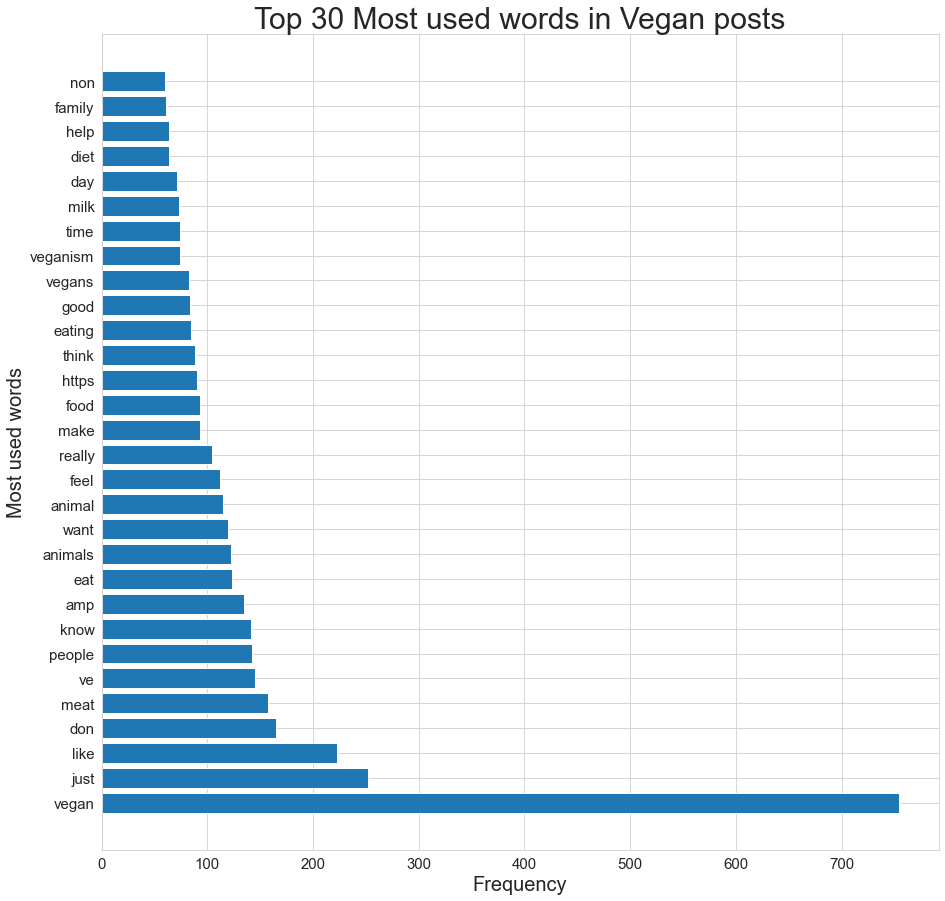

In [32]:
# Create bar chart to inspect Top 30 most common words
vegan_words_df = pd.DataFrame(vegan_token_no_stop, columns=['words'])
vegan_T30 = pd.DataFrame(vegan_words_df['words'].value_counts().head(30))

plt.figure(figsize=(15,15))
plt.barh(vegan_T30.index, vegan_T30['words'])

plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel("Frequency", fontsize=20)
plt.ylabel("Most used words", fontsize=20)
plt.title("Top 30 Most used words in Vegan posts", fontsize=30);

## <font color=green>Vegan posts Word Cloud</font>

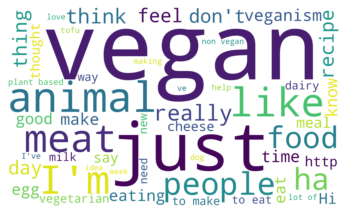

In [33]:
# Create stopword list:
# stopwords = set(stop_words.ENGLISH_STOP_WORDS)
stopwords.update(["https", "www", "want", "go"])

# Generate a word cloud image
wordcloud = WordCloud(width=2000,height=1200, max_words=50, 
                      stopwords=stopwords, 
                      background_color="white").generate(vegan_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## <font color=green>Keto posts most frequently used words</font>

In [34]:
# join all vegan posts into a single string
keto_text = " ".join(post for post in keto['title_selftext'])
print (f"There are {len(keto_text)} words in all the Keto subreddit post")

There are 530474 words in all the Keto subreddit post


In [35]:
# tokenize
keto_token = tokenizer.tokenize(keto_text.lower())

In [36]:
# exclude stop words from tokens
keto_token_no_stop = [word for word in keto_token if word not in stopwords]

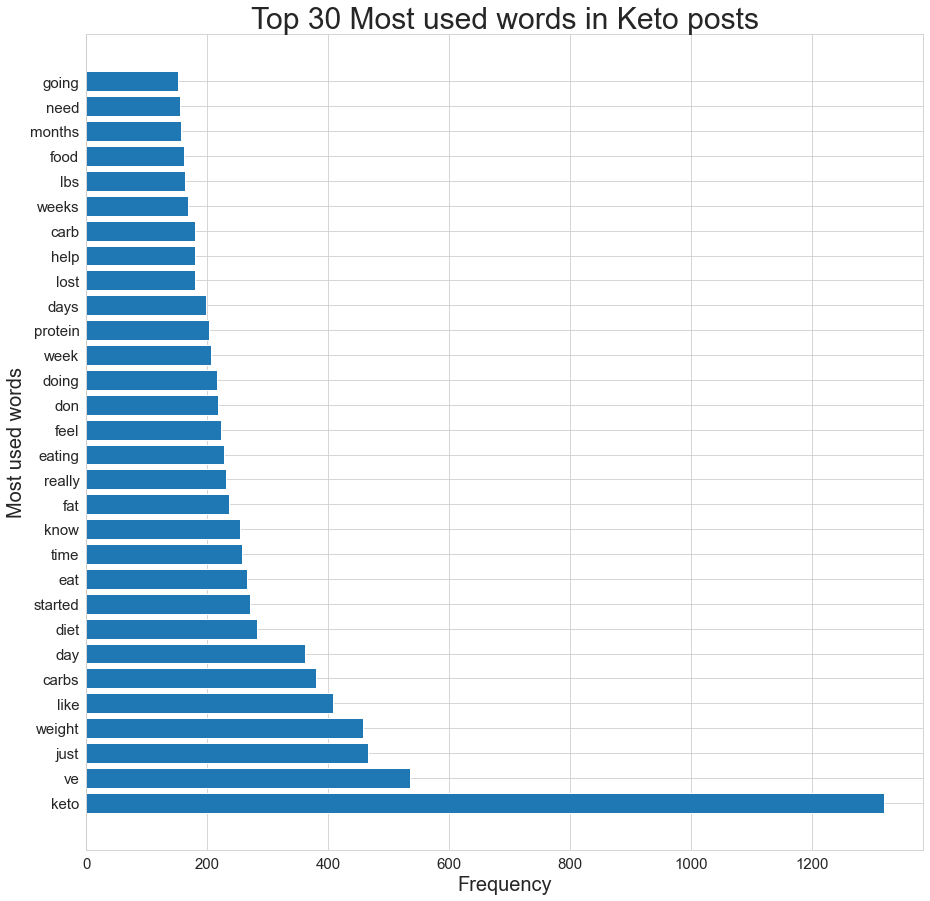

In [37]:
# Create bar chart to inspect Top 30 most common words
keto_words_df = pd.DataFrame(keto_token_no_stop, columns=['words'])
keto_T30 = pd.DataFrame(keto_words_df['words'].value_counts().head(30))

plt.figure(figsize=(15,15))
plt.barh(keto_T30.index, keto_T30['words'])

plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel("Frequency", fontsize=20)
plt.ylabel("Most used words", fontsize=20)
plt.title("Top 30 Most used words in Keto posts", fontsize=30);

## <font color=green>Vegan posts Word Cloud</font>

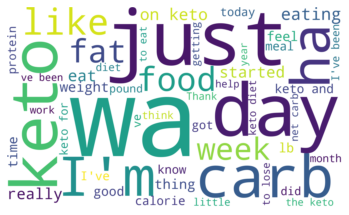

In [38]:
# Create stopword list:
# stopwords = set(stop_words.ENGLISH_STOP_WORDS)
stopwords.update(["https", "www", "want", "go"])

# Generate a word cloud image
wordcloud = WordCloud(width=2000,height=1200, max_words=50, 
                      stopwords=stopwords, 
                      background_color="white").generate(keto_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## <font color=green>It seems like both the words vegan and keto are repeatly used in respective subreddits. That should help our models to score well in terms of accuracy</font>

<font color=green>Vertically join vegan and keto datasets into a single vegan_keto dataset.<br>
<br>
Using 'subreddit' column, we create a new 'subreddit_tgt' column mapping vegan to 0 and keto to 1<br>
<br>
Save as csv to Data folder for modeling</font>

In [39]:
vegan_keto = pd.concat([vegan, keto], axis=0)
vegan_keto.reset_index(inplace=True)

In [40]:
vegan_keto.shape

(1444, 115)

In [41]:
vegan_keto['subreddit_tgt'] = vegan_keto['subreddit'].map({'vegan': 0, 'keto': 1})
vegan_keto.head()

index  approved_at_utc subreddit  \
0      0              NaN     vegan   
1      1              NaN     vegan   
2      2              NaN     vegan   
3      3              NaN     vegan   
4      4              NaN     vegan   

                                            selftext author_fullname  saved  \
0  Hi folks!\n\nThe [Vegan Hacktivists](https://v...     t2_2xq9ryss  False   
1                                                        t2_6klubbgh  False   
2                                                        t2_5pfjptq1  False   
3                                                        t2_6wksotg4  False   
4                                                          t2_7jjvhh  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   

                                               title link_flair_richtext  \
0  Vegan Hacktivists are looking for Developers, ...                  []   
1  The last words of fellow vegan Elijah McClain ...                  []   
2  30 POUNDS DOWN! Have been vegan since May 3 an...                  []   
3  All Mink Fur Farms To Shut In The Netherlands ...                  []   
4                     Very promising future i think.                  []   

  subreddit_name_prefixed  hidden  pwls link_flair_css_class  downs  \
0                 r/vegan   False     6                  NaN      0   
1                 r/vegan   False     6           Disturbing      0   
2                 r/vegan   False     6               Health      0   
3                 r/vegan   False     6                  NaN      0   
4                 r/vegan   False     6                  NaN      0   

   thumbnail_height  top_awarded_type  hide_score       name  quarantine  \
0               NaN               NaN       False  t3_f3svif       False   
1             140.0               NaN       False  t3_hf6eej       False   
2             140.0               NaN       False  t3_hf55ez       False   
3              93.0               NaN       False  t3_hezfns       False   
4             114.0               NaN       False  t3_hfkmlc       False   

  link_flair_text_color  upvote_ratio author_flair_background_color  \
0                  dark          0.95                           NaN   
1                  dark          0.94                           NaN   
2                  dark          0.99                           NaN   
3                  dark          0.99                           NaN   
4                  dark          0.93                           NaN   

  subreddit_type   ups  total_awards_received  \
0         public    79                      3   
1         public  4858                      0   
2         public  1826                      1   
3         public  2664                      0   
4         public    22                      0   

                                         media_embed  thumbnail_width  \
0                                                 {}              NaN   
1  {'content': '&lt;iframe class="embedly-embed" ...            140.0   
2                                                 {}            140.0   
3                                                 {}            140.0   
4                                                 {}            140.0   

  author_flair_template_id  is_original_content user_reports  \
0                      NaN                False           []   
1                      NaN                False           []   
2                      NaN                False           []   
3                      NaN                False           []   
4                      NaN                False           []   

                                        secure_media  is_reddit_media_domain  \
0                                                NaN                   False   
1  {'

In [42]:
vegan_keto.tail()

index  approved_at_utc subreddit  \
1439  10193              NaN      keto   
1440  10194              NaN      keto   
1441  10195              NaN      keto   
1442  10196              NaN      keto   
1443  10197              NaN      keto   

                                               selftext author_fullname  \
1439  For those that have fallen off keto and come b...      t2_fv7ldy9   
1440  I've been strict keto the last month, usually ...     t2_1zj5h61i   
1441   [https://imgur.com/a/Rujbvly](https://imgur.c...     t2_2lvoyyqx   
1442  Hey all, restarting Keto after a few years. Th...        t2_5vgyk   
1443  http://imgur.com/gallery/v1o11b5\n\nI'm so app...        t2_cvuhw   

      saved  mod_reason_title  gilded  clicked  \
1439  False               NaN       0    False   
1440  False               NaN       0    False   
1441  False               NaN       0    False   
1442  False               NaN       0    False   
1443  False               NaN       1    False   

                                                  title  \
1439                                   Keto resilience?   
1440     Sneaky dietary fiber and carbs in supplements?   
1441  6 Months of Keto Update - 42" Waist down to 36...   
1442  Restarting Keto - requesting tips on finding m...   
1443                                   9 Months of Keto   

               link_flair_richtext subreddit_name_prefixed  hidden  pwls  \
1439                            []                  r/keto   False     6   
1440                            []                  r/keto   False     6   
1441                            []                  r/keto   False     6   
1442  [{'e': 'text', 't': 'Help'}]                  r/keto   False     6   
1443                            []                  r/keto   False     6   

     link_flair_css_class  downs  thumbnail_height  top_awarded_type  \
1439                  NaN      0               NaN               NaN   
1440                  NaN      0               NaN               NaN   
1441                  NaN      0               NaN               NaN   
1442                  SOS      0               NaN               NaN   
1443                  NaN      0               NaN               NaN   

      hide_score       name  quarantine link_flair_text_color  upvote_ratio  \
1439       False  t3_h8uvus       False                  dark          0.60   
1440       False  t3_h8uvf2       False                  dark          0.66   
1441       False  t3_h82ozg       False                  dark          0.98   
1442       False  t3_h8yfz1       False                  dark          0.43   
1443       False  t3_h7styy       False                  dark          0.97   

     author_flair_background_color subreddit_type   ups  \
1439                       #edeff1         public     1   
1440                           NaN         public     1   
1441                           NaN         public   322   
1442                       #edeff1         public     0   
1443                       #edeff1         public  1937   

      total_awards_received media_embed  thumbnail_width  \
1439                      0          {}              NaN   
1440                      0          {}              NaN   
1441                      0          {}              NaN   
1442                      0          {}              NaN   
1443                      2          {}              NaN   

                  author_flair_template_id  is_original_content user_reports  \
1439  bf715102-aa2c-11e9-835a-0e92680f1d3e                False           []   
1440                                   NaN                False           []   
1441                                   NaN                False           []   
1442  bf715102-aa2c-11e9-835a-0e92680f1d3e                False           []   
1443  bf715102-aa2c-11e9-835a-0e92680f1d3e                False           []   

     secure_media  is_reddit_media_domain  is_meta  category  \
1439          NaN   

In [43]:
vegan_keto.to_csv('../Data/vegan_keto.csv', index = False)